# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [109]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [110]:
best_bar_add = pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [111]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [112]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормального (распределение Гаусса). Поэтому графики плотности еще называют ядерной оценки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

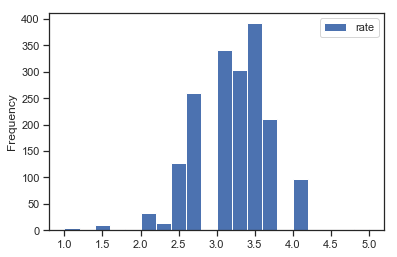

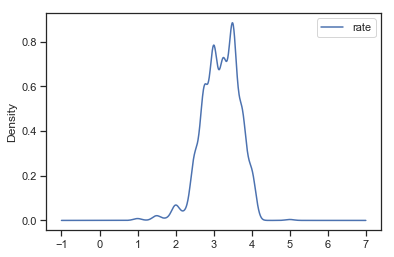

In [113]:
# code here

best_bar.plot.hist(bins = 20)
best_bar.plot.kde()

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получится. 
Необходимо преобразовать данный тип в float с помощью функции apply. Внутри функции apply используйте lambda выражение, чтобы убрать знак '%' в конце каждого элемента, а затем преобразовать данные в тип с плавающей точкой.

In [114]:
best_bar.head()

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


In [115]:
best_bar.percent.dtype
# code here
best_bar.percent = best_bar.percent.apply(lambda x : x[:-1]).astype(float)
best_bar.head()

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru


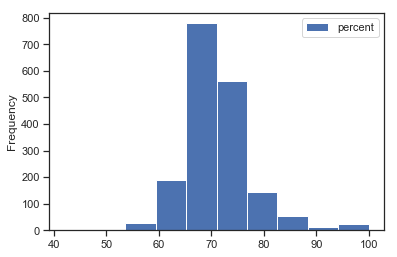

In [116]:
best_bar.plot.hist(y = 'percent')

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.
Необходимо это для того, чтобы оценить зависимость рейтинга от содержания кокао в батончиках. 

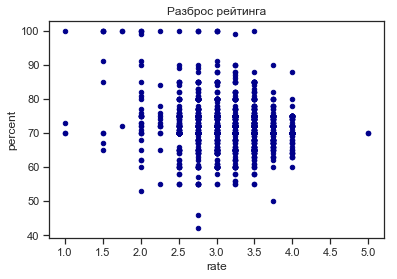

In [117]:

# code here

best_bar.plot.scatter(x='rate', y='percent', c='DarkBlue', title='Разброс рейтинга')


Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

,rate,percent
count,1795.000000,1795.000000
mean,3.185933,71.698329
std,0.478062,6.323118
min,1.000000,42.000000
25%,2.875000,70.000000
50%,3.250000,70.000000
75%,3.500000,75.000000
max,5.000000,100.000000


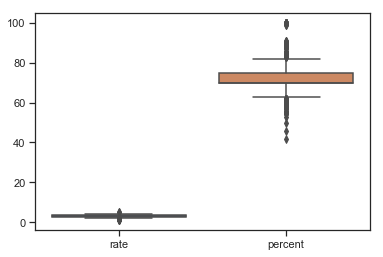

In [118]:
sns.boxplot(data=best_bar)
best_bar.describe()

## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удастся, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [119]:
print(best_bar['company_loc'].value_counts())
data = best_bar['company_loc'].value_counts()
data_top = data.head()
print(data_top)
data_bot = data.tail()
print(data_bot)

U.S.A.               764
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
Peru                  17
Brazil                17
Madagascar            17
New Zealand           17
Denmark               15
Vietnam               11
Guatemala             10
Scotland              10
Costa Rica             9
Argentina              9
Israel                 9
Poland                 8
Lithuania              6
Honduras               6
Nicaragua              5
South Korea            5
Sweden                 5
Domincan Republic      5
Mexico                 4
Puerto Rico            4
Ireland                4
Netherlands            4
Fiji                   4
Sao Tome               4


После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

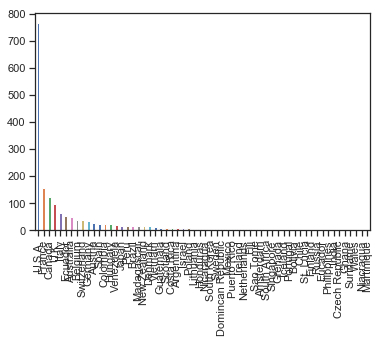

In [120]:
data.plot.bar()

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis': где 0 - удалять по строкам (объектам), 1 - удалять по столбцам (признакам); 'how': где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [121]:

# print(best_bar.dropna(axis= 0))

# print(best_bar.dropna(how='any'))
data1= best_bar.dropna(axis= 0)
print(best_bar.dropna(axis= 0))



     company_loc  rate  percent           bean_orig
0         France  3.75     63.0            Sao Tome
1         France  2.75     70.0                Togo
2         France  3.00     70.0                Togo
3         France  3.50     70.0                Togo
4         France  3.50     70.0                Peru
5         France  2.75     70.0           Venezuela
6         France  3.50     70.0                Cuba
7         France  3.50     70.0           Venezuela
8         France  3.75     70.0           Venezuela
9         France  4.00     70.0                Peru
10        France  2.75     70.0              Panama
11        France  3.00     70.0          Madagascar
12        France  3.25     70.0              Brazil
13        France  3.75     70.0             Ecuador
14        France  2.75     70.0            Colombia
15        France  3.00     70.0               Burma
16        France  3.25     70.0    Papua New Guinea
17        France  4.00     70.0           Venezuela
18        Fr

Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [122]:
data1['bean_orig'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Per

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [123]:
#best_bar['bean_orig'] != '\xa0'
mask = data1['bean_orig'] != '\xa0'
data1[mask]

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru
5,France,2.75,70.0,Venezuela
6,France,3.50,70.0,Cuba
7,France,3.50,70.0,Venezuela
8,France,3.75,70.0,Venezuela
9,France,4.00,70.0,Peru


Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [124]:
data2 = data1['bean_orig'].value_counts() <= 5

def getter(bar):
    return data2[bar]

data2Mask = data1['bean_orig'].apply(getter)
new = data1['bean_orig'].mask(data2Mask, 'complex')

data1.assign(bean_orig=new)

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,complex
2,France,3.00,70.0,complex
3,France,3.50,70.0,complex
4,France,3.50,70.0,Peru
5,France,2.75,70.0,Venezuela
6,France,3.50,70.0,Cuba
7,France,3.50,70.0,Venezuela
8,France,3.75,70.0,Venezuela
9,France,4.00,70.0,Peru


Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

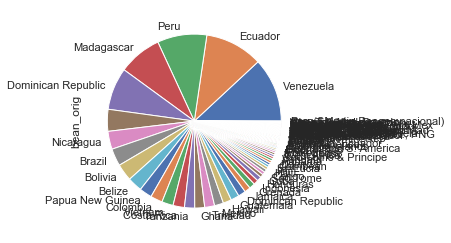

In [125]:
data1['bean_orig'].value_counts().plot.pie()

## Попарные графики распределений

In [126]:
from sklearn import preprocessing
from seaborn import pairplot
import statistics



Построить попарные распределения для всех признаков.

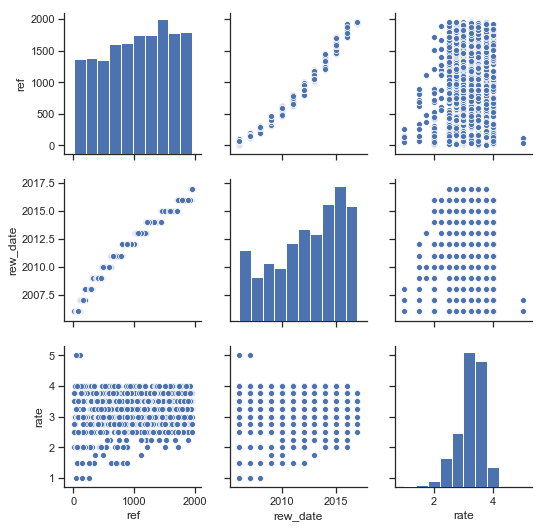

In [130]:
pairplot(best_bar_add)



Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [159]:
average = data1.groupby(['bean_orig']).mean()

In [166]:
head_average = average.sort_values(by = 'rate', ascending = False)
head_average.head(3)



,rate,percent
bean_orig,,
"Ven, Bolivia, D.R.",4.0,70.0
"Dom. Rep., Madagascar",4.0,70.0
"Guat., D.R., Peru, Mad., PNG",4.0,88.0


In [168]:
median = data1.groupby(['bean_orig']).median()
head_median = median.sort_values(by = 'rate', ascending = False)
head_median.head(3)

,rate,percent
bean_orig,,
"Ven, Bolivia, D.R.",4.0,70.0
"Guat., D.R., Peru, Mad., PNG",4.0,88.0
"Peru, Dom. Rep",4.0,67.0


Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.

In [174]:
average1 = best_bar_add.groupby(['company']).mean()
head_average1 = average1.sort_values(by = 'rate', ascending = False)
head_average1.head(1)


,ref,rew_date,rate
company,,,
Tobago Estate (Pralus),895.0,2012.0,4.0


In [173]:
median1 = best_bar_add.groupby(['company']).median()
head_median1 = median1.sort_values(by = 'rate', ascending = False)
head_median1.head(1)

,ref,rew_date,rate
company,,,
Tobago Estate (Pralus),895.0,2012.0,4.0
